<center><b>EE 538 Spring 2021<br>
Homework 1<br>
</b></center>


1. a)

\begin{equation}
H(s)={\frac {\omega _{0}^{2}}{s^{2}+2\zeta \omega _{0}\cdot s+\omega _{0}^{2}}}
\end{equation}

\begin{equation}
s=j \omega
\end{equation}

\begin{equation}
H(\omega)={\frac {\omega _{0}^{2}}{(j \omega)^{2}+ 2 \zeta \omega _{0} (j \omega)+\omega _{0}^{2}}}
\end{equation}

\begin{equation}
H(\omega)={\frac {\omega _{0}^{2}}{\omega _{0}^{2} - \omega^{2} +j2\zeta \omega _{0} \omega}}
\end{equation}

\begin{equation}
|H(\omega)|={\frac {\omega _{0}^{2}}{\sqrt{(\omega _{0}^{2} - \omega^{2})^{2} +(2\zeta \omega _{0} \omega})^{2}}}
\end{equation}

\begin{equation}
|H(\omega)|^{2}={\frac {\omega _{0}^{4}}{(\omega _{0}^{2} - \omega^{2})^{2} + 4\zeta^2 \omega _{0}^{2} \omega^{2}}}
\end{equation}

\begin{equation}
|H(\omega)|^{2}={\frac {\omega _{0}^{4}}{\omega _{0}^{4} - 2\omega_0^2\omega^2 + \omega^{4} + 4\zeta^2 \omega _{0}^{2} \omega^{2}}}
\end{equation}

\begin{equation}
|H(\omega)|^{2}={\frac {\omega _{0}^{4}}{\omega _{0}^{4} + \omega^{4} + \omega _{0}^{2} \omega^{2}(4\zeta^2 - 2)}}
\end{equation}

Office hours, slack: $\zeta$ for Butterworth filter is $\frac{1}{\sqrt{2}}$

\begin{equation}
4\left(\frac{1}{\sqrt 2}\right)^2 - 2 = 0
\end{equation}

\begin{equation}
|H(\omega)|^{2}={\frac {1}{1 + \left(\frac{\omega}{\omega_0}\right)^4}}
\end{equation}

\begin{equation}
\omega_{enb} = \int {\frac {1}{1 + \left(\frac{\omega}{\omega_0}\right)^4}} d \omega
\end{equation}

At this point, some fancy trigonometry identity substitution happens which I can't think of. "Noise Reduction Techniques in Electronic Systems" 2nd Ed, Henry W Ott, chapter 8, and https://analog.intgckts.com/equivalent-noise-bandwidth/


\begin{equation}
\omega_{enb}=\frac{\pi}{2\sqrt{2}}\frac{\omega_0}{2\pi}
\end{equation}

1.b) for Butterworth filter the pole frequency is the same as the -3dB frequency (https://analog.intgckts.com/equivalent-noise-bandwidth/)

\begin{equation}
\omega_{enb}=\frac{\pi}{2\sqrt{2}}\omega_{3dB}=1.11 \omega_{3dB}
\end{equation}

1.c) Since the active filter is ideal (noiseless resistors and opamp) all noise is due to the thermal noise of $R_s$. $R_s = 1k$, $v_{no}=40e-9$, what is $\Delta f$?

\begin{equation}
v_{n(rms)} = e_n \sqrt{\Delta f}= \sqrt{4 k T R_s \Delta f}
\end{equation}

For $\Delta f = 1Hz$ at room temperature (293K):

\begin{equation}
v_{n(rms)} = e_n\sqrt{1}=\sqrt{4 \times 293 \times 1.38 \times 10^{-23} \times 10^3} = 4 \times 10^{-9} = 4nV
\end{equation}

To limit $v_{no}=40nV$:

\begin{equation}
40nV = 4nV \sqrt{\Delta f} \\
\sqrt{\Delta f} = 10 \\
\Delta f = 100Hz
\end{equation}

Knowing the bandwidth at which we get 40nV rms noise, we can determine $\omega_{3dB}$ (assuming unity gain in the filter):

\begin{equation}
\omega_{enb} = 100 = 1.11 \omega_{3dB} \\
\omega_{3dB} = 100 / 1.11 = 90Hz
\end{equation}

Filter components are calculated using simplification A.1.4 for Sallen Key architectures in TI Application Report "Active Low-Pass Filter Design":

\begin{equation}
f_c = \frac{1}{2 \pi R C}, R1 = R2 = R, C1 = C2 = C \\
RC = \frac{1}{2 \pi 90} = 0.00176 \\
C = 0.1 uF, R = 17k
\end{equation}

I am not sure why the corner frequency calculated using the formula in the TI paper is so far off the LTSpice simulation? I verified using a Sallen Key calculator which substitutes in the transfer function (screenshot below). I also found that the total noise changes if I change the ratio of C to R even though R are noiseless and $e_n$, $i_n$ are zero for the opamp?!

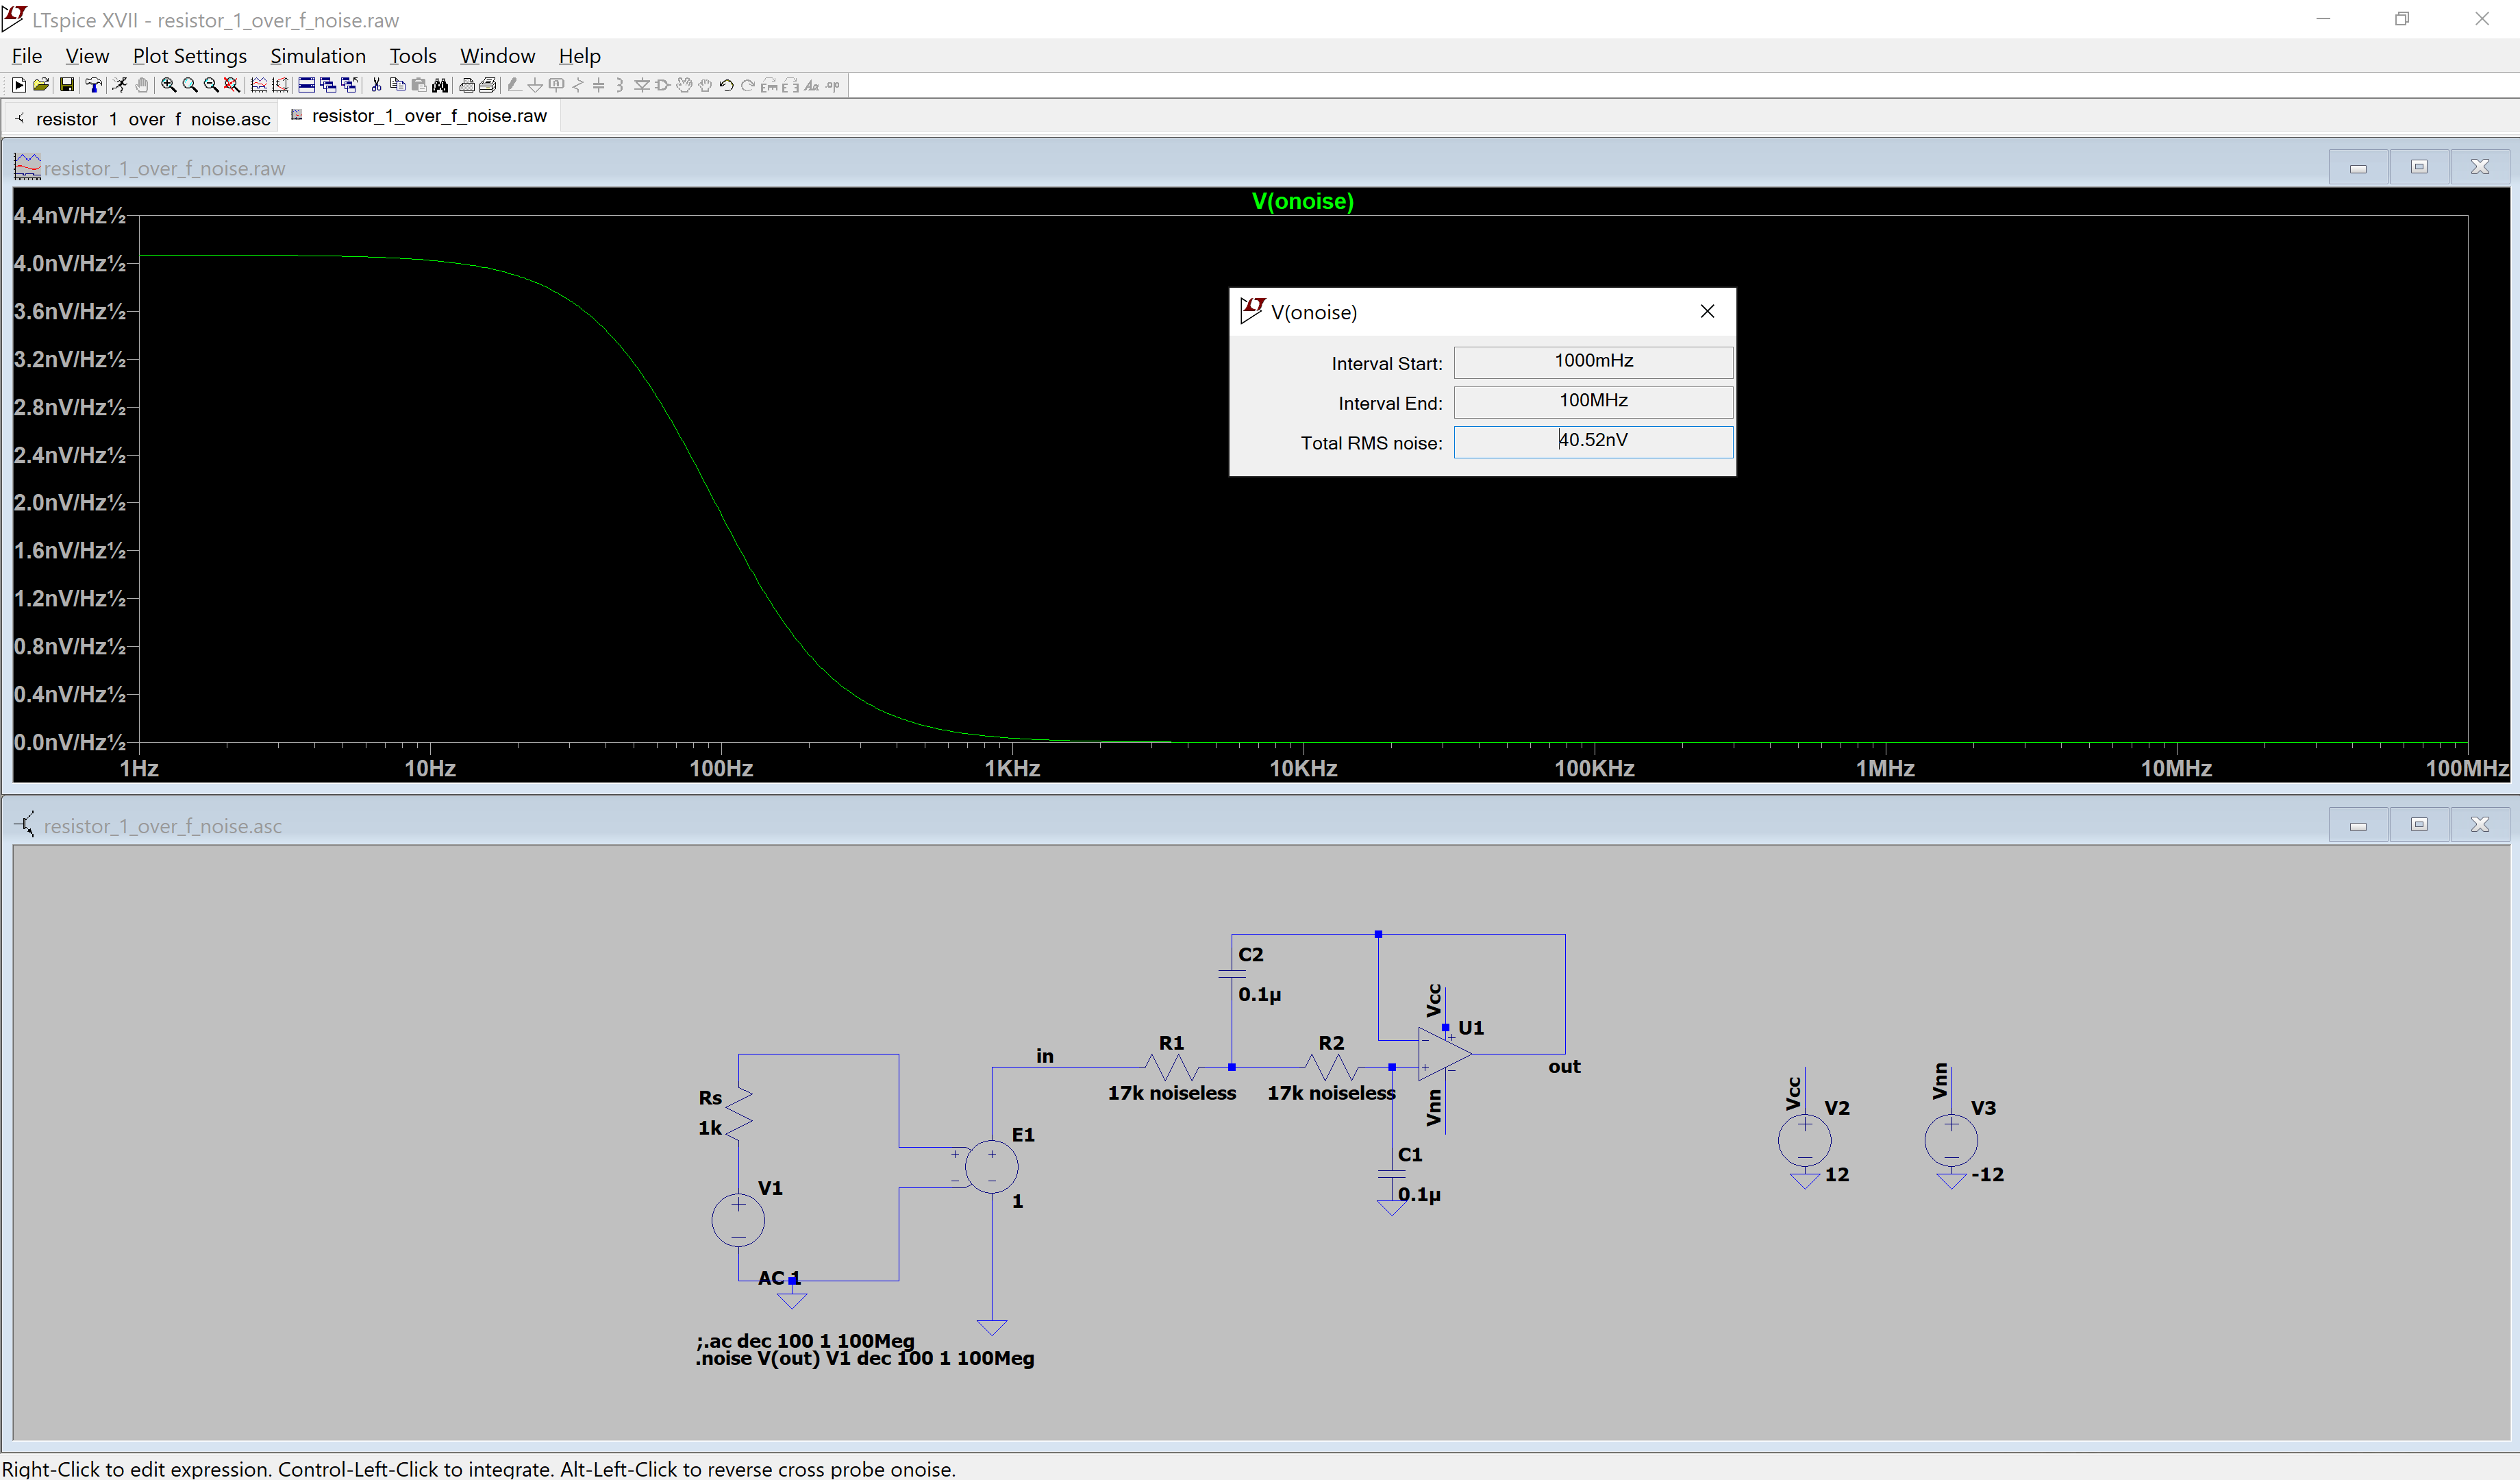

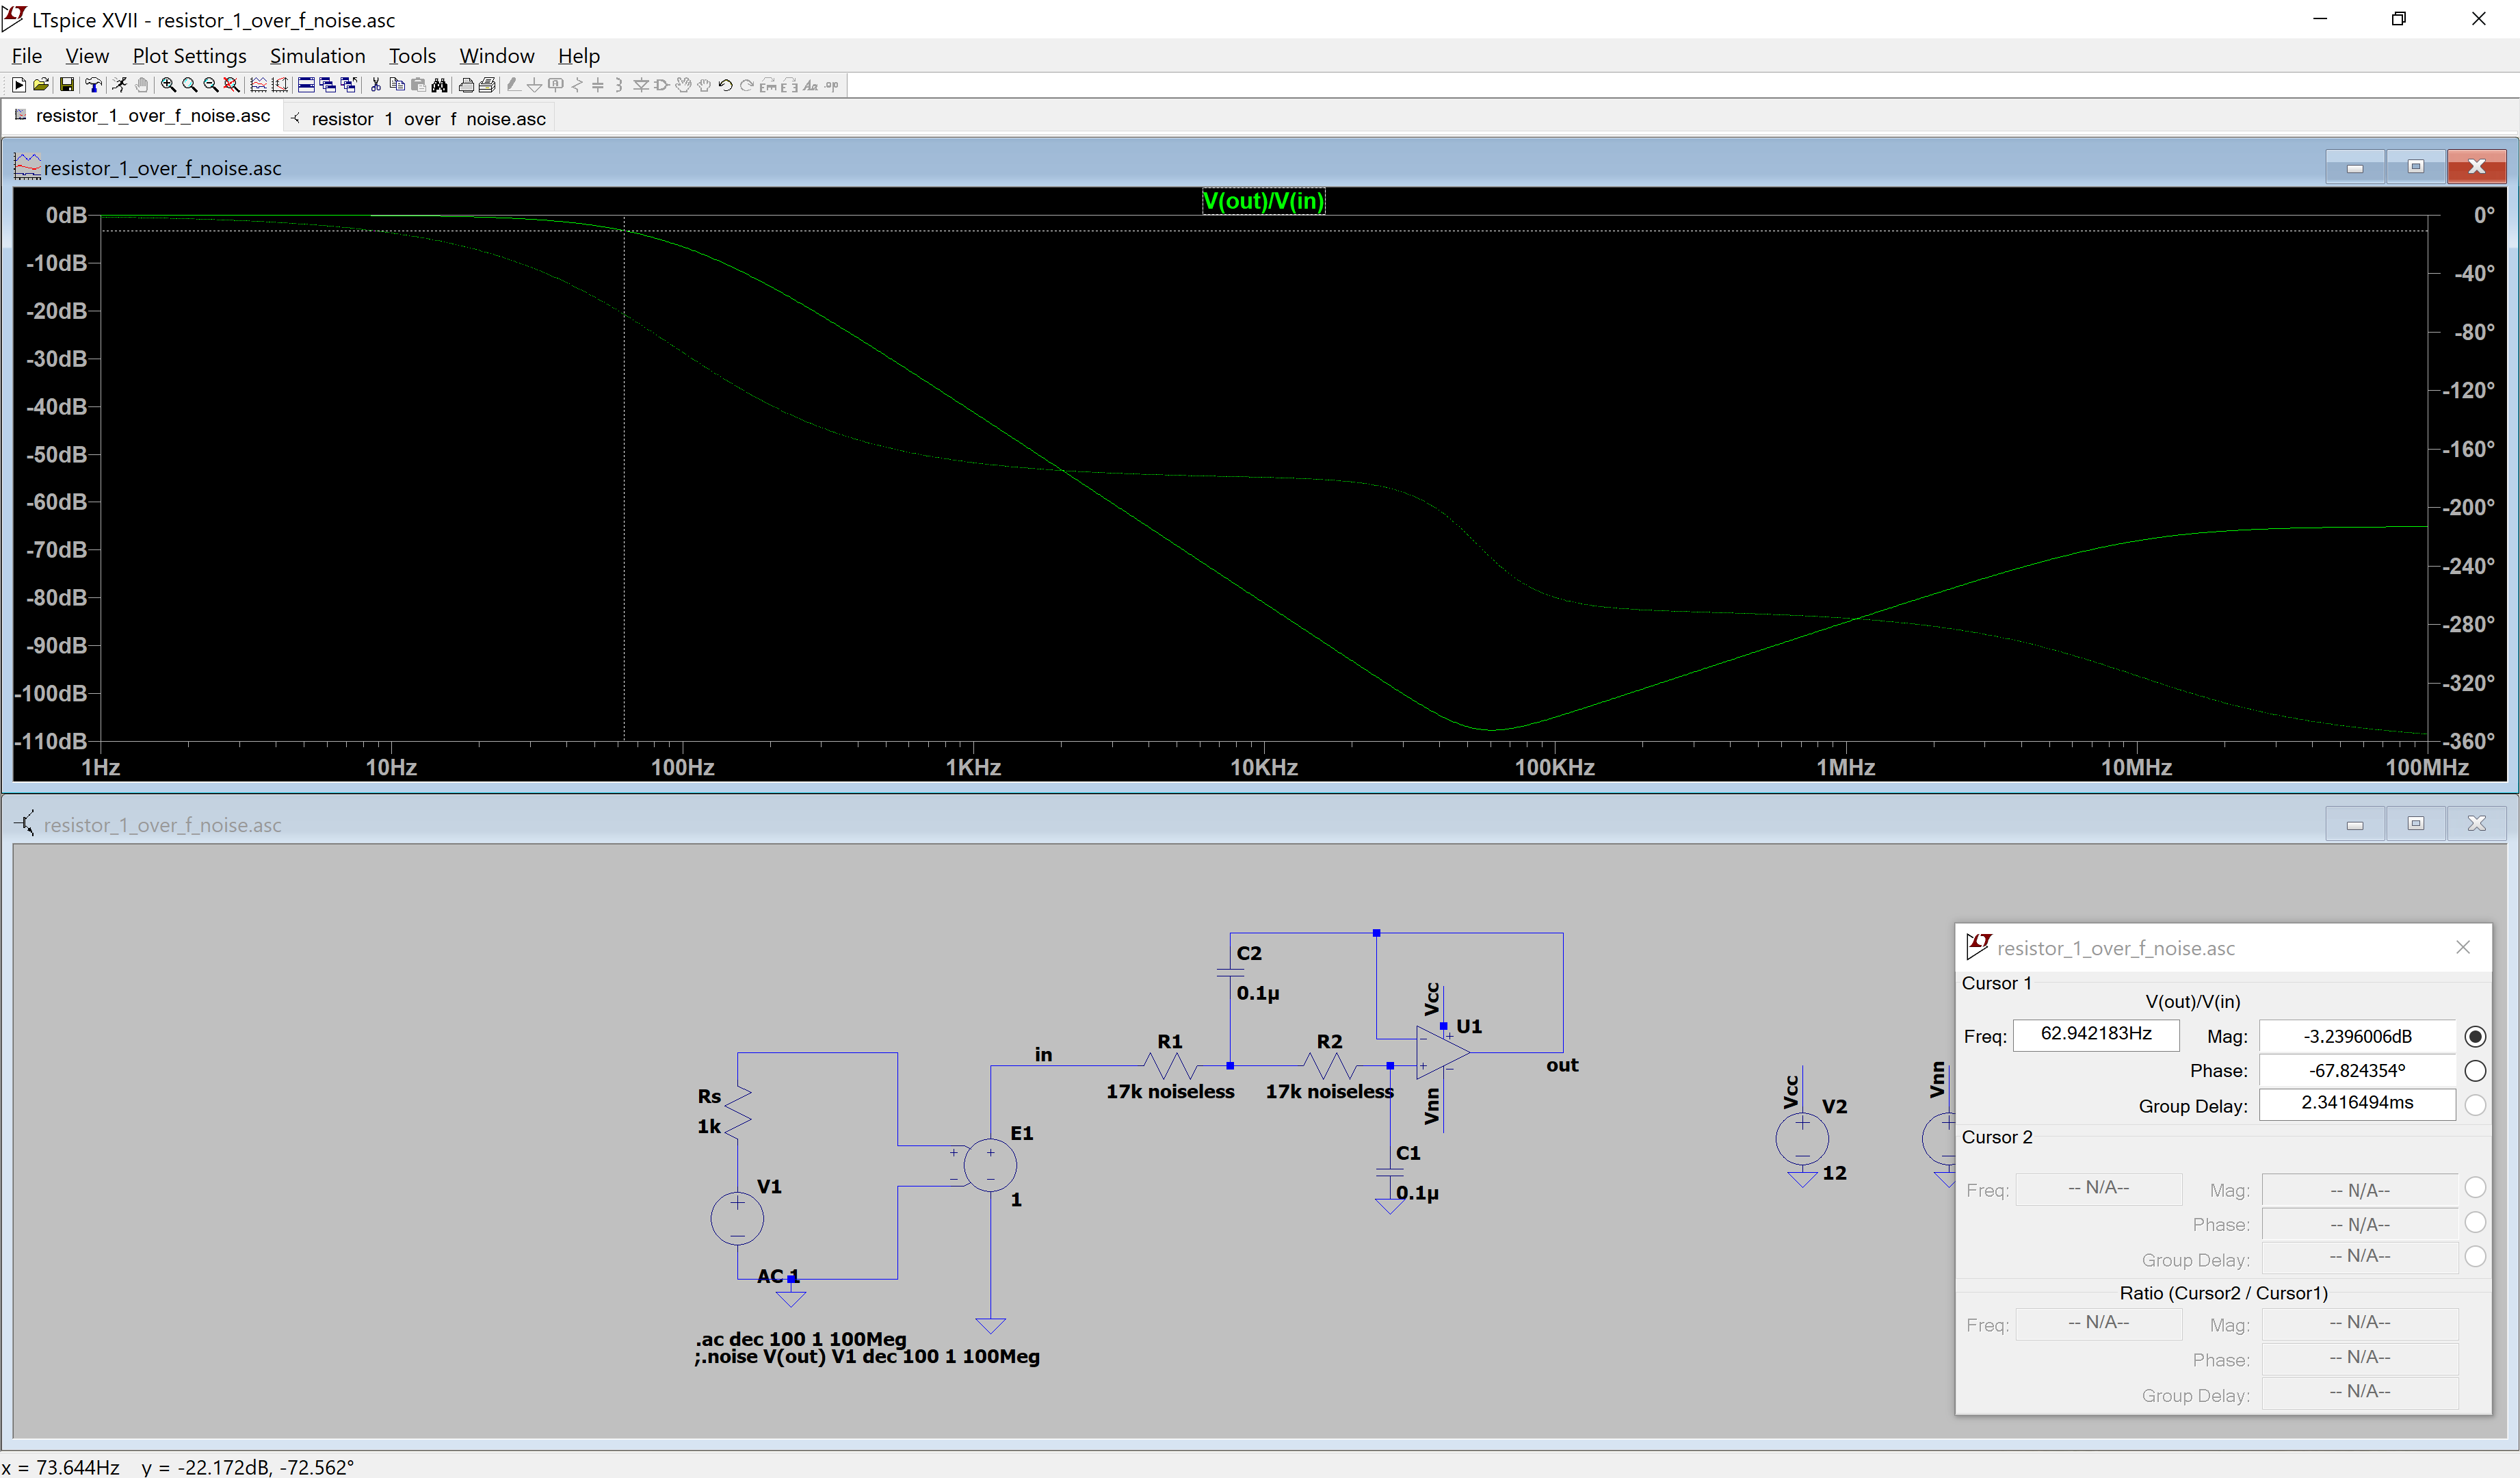

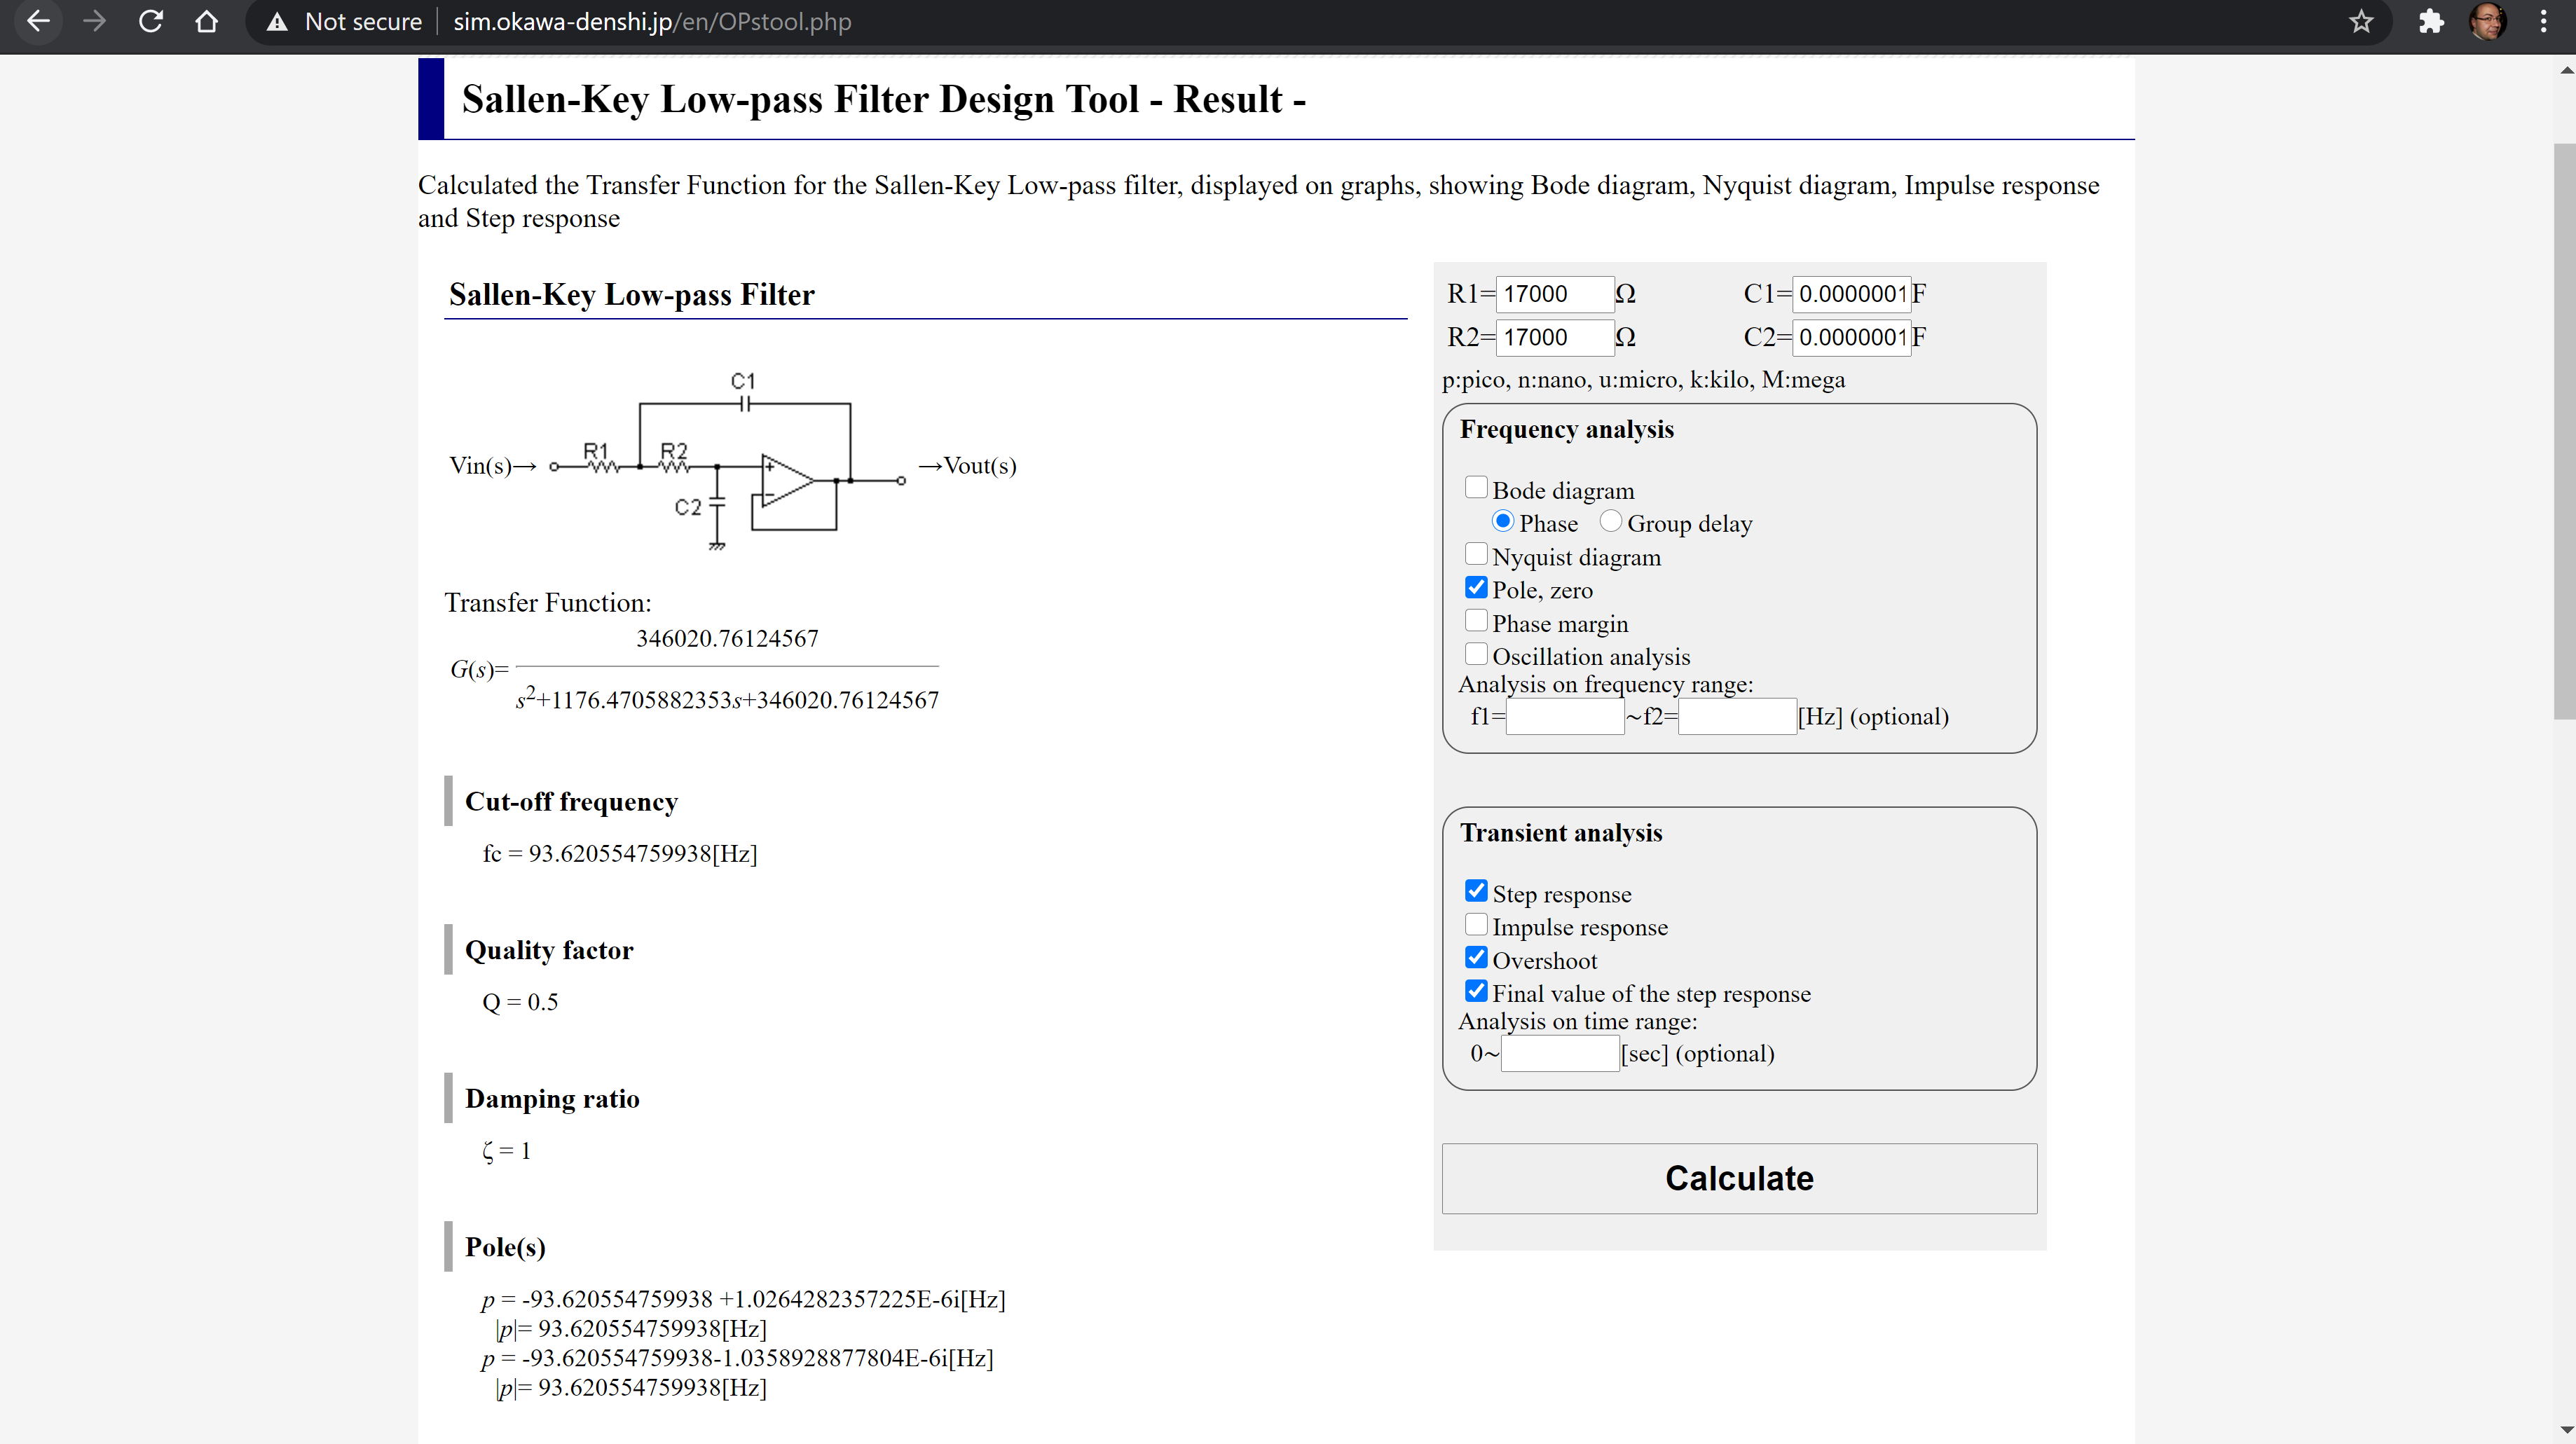

1.e)

\begin{equation}
e_{nw}^2 = 4kTR \\
e_{nt}^2 = e_{nw}^2 \left(1 + \frac{f_c}{f}\right) \\
\end{equation}

The magnitude of the filter response can be estimated using the results from a) and b). We can neglect the conversion to radians because the $2\pi$ cancel out:

\begin{equation}
|H(\omega)|^2={\frac {1}{1 + \left(\frac{f}{f_c}\right)^4}}
\end{equation}

The filtered total noise as a function of frequency:
\begin{equation}
e_{nf}^2 = {\frac {1}{1 + \left(\frac{f}{f_{cfilter}}\right)^4}}4kTR \left(1 + \frac{f_{cflicker}}{f}\right) \\
e_{nftot} = \sqrt{\int e_{nf}^2 df}
\end{equation}

Unfortunately python is not numerically precise enough to estimate the integral $e_{nftot}$ from 1 to 1Mhz. Performing the calculation with Wolframalpha gives a result which is close to LTSpice within a small margin of error:
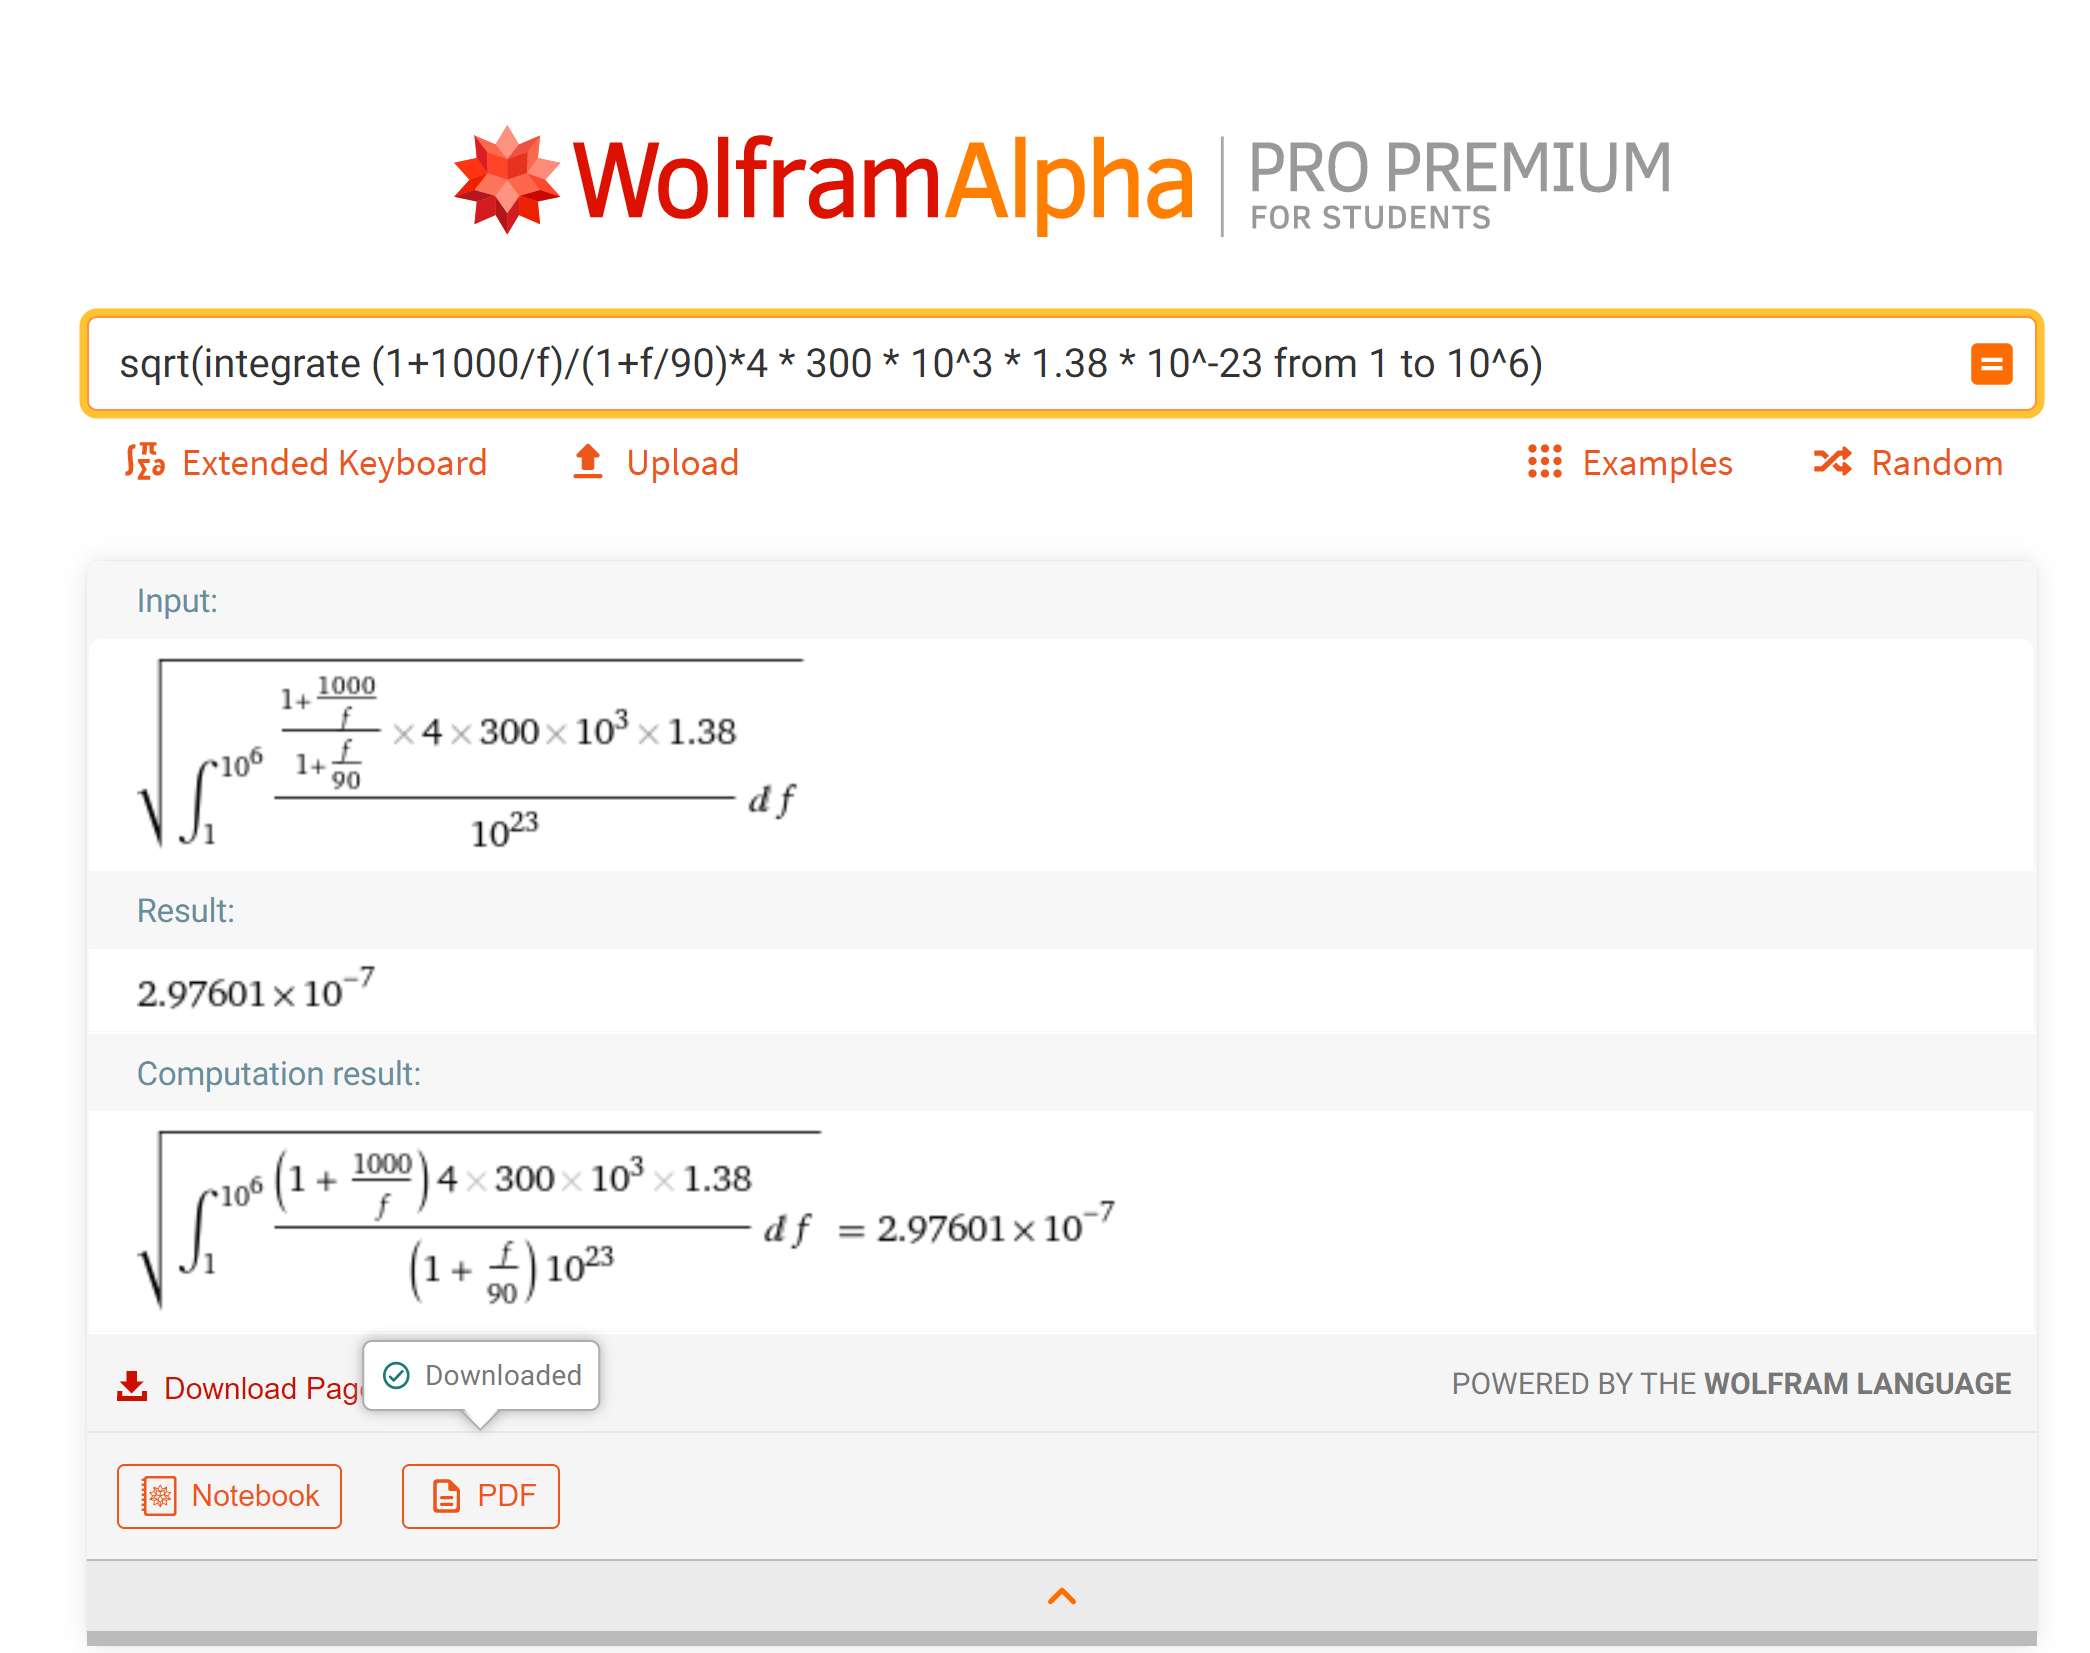

The noise bandwidth concept only applies to white noise. The reason is that the enb concept exploits the fact that on average, white noise is constant across the spectrum. This lets us simplify the integral to a multiplication.

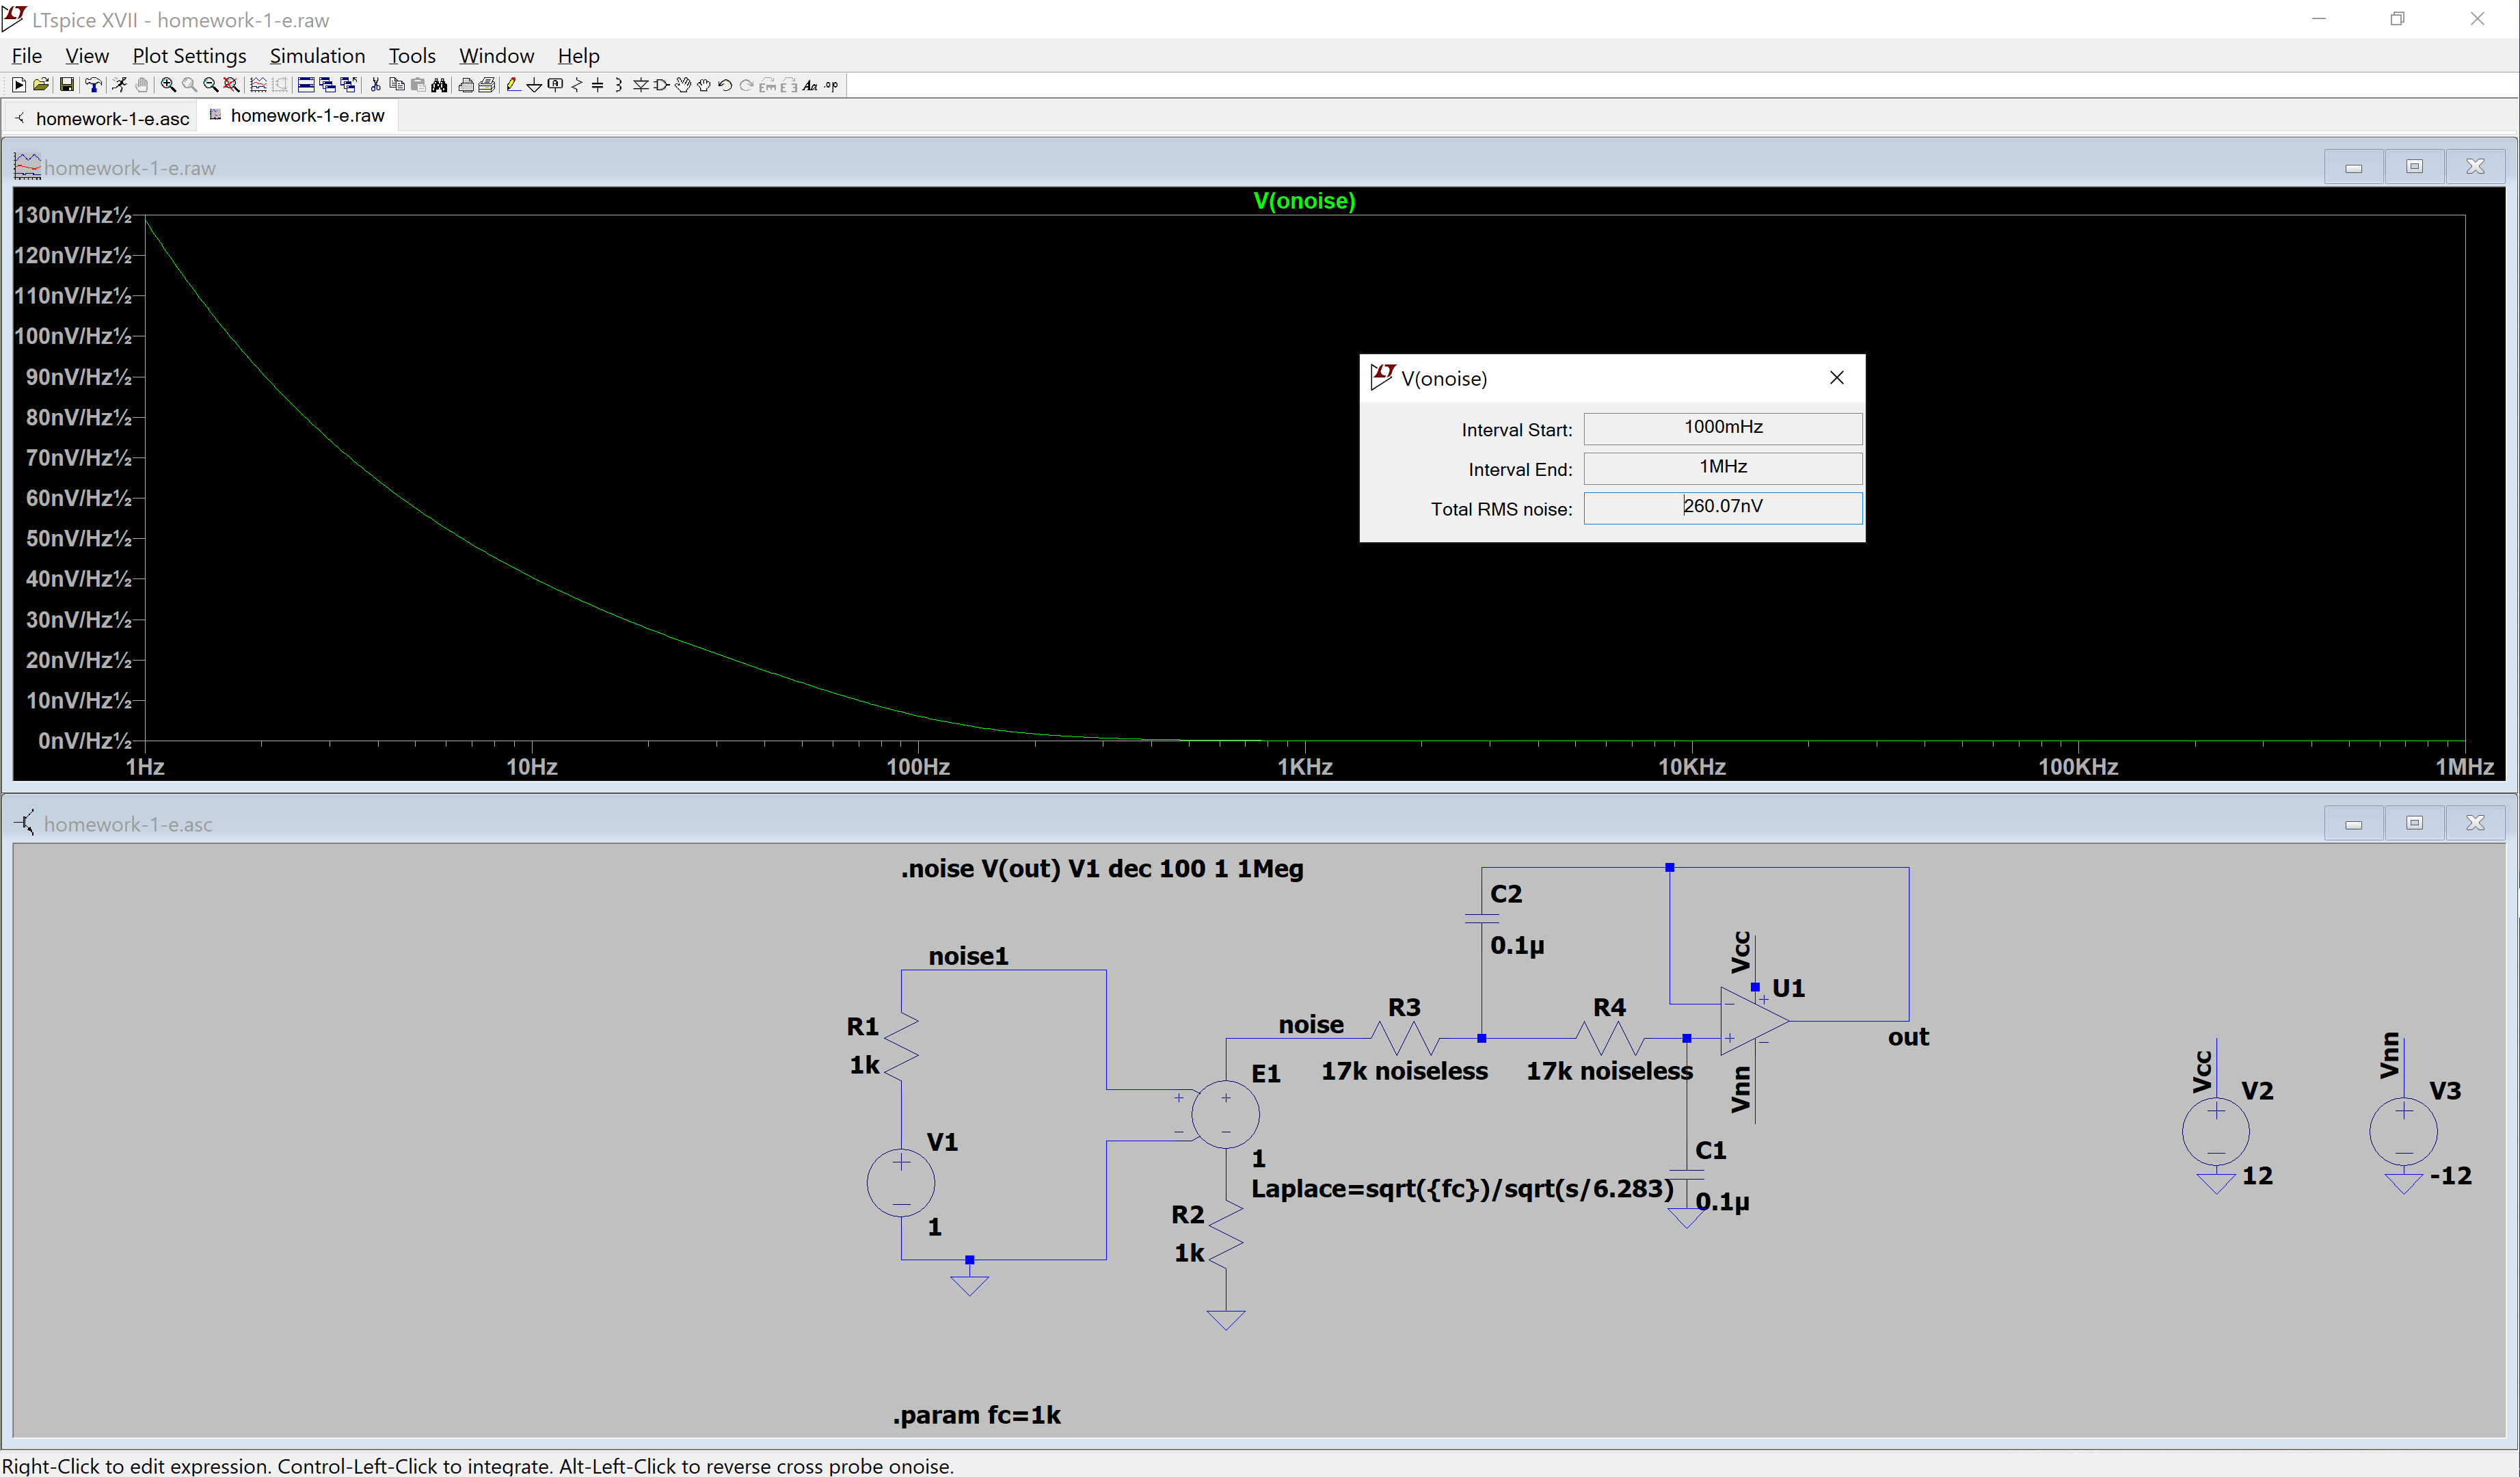